In [22]:
import os.path as osp
import json
import os

version = '1'
out_dir_hico = f'./filtered_data/v_{version}/hico'
out_dir_vcoco = f'./filtered_data/v_{version}/vcoco'
out_dir_phosa = f'./filtered_data/v_{version}/phosa_split'
out_dir_behave = f'./filtered_data/v_{version}/behave_split'

objectwise_img_dict_hico = osp.join(out_dir_hico, 'imgnames_per_object_dict.json')
objectwise_img_dict_vcoco = osp.join(out_dir_vcoco, 'imgnames_per_object_dict.json')

with open(objectwise_img_dict_hico, 'r') as fp:
    objectwise_img_dict_hico = json.load(fp)
with open(objectwise_img_dict_vcoco, 'r') as fp:
    objectwise_img_dict_vcoco = json.load(fp)

# sort the dictionary 
objectwise_img_names1 = dict(sorted(objectwise_img_dict_hico.items(), key=lambda x: len(x[1]), reverse=True))

# # Extract object names and image counts
# obj_names1 = list(objectwise_img_names_hico.keys())
# print(sorted(obj_names1))
# image_count1 = [len(objectwise_img_names_hico[obj]) for obj in objectwise_img_names_hico]
# print(sum(image_count1))

# sort the dictionary 
objectwise_img_names2 = dict(sorted(objectwise_img_dict_vcoco.items(), key=lambda x: len(x[1]), reverse=True))

# # Extract object names and image counts
# obj_names2 = list(objectwise_img_names_vcoco.keys())
# print(sorted(obj_names2))
# image_count2 = [len(objectwise_img_names_vcoco[obj]) for obj in objectwise_img_names_vcoco]
# print(sum(image_count2))



In [18]:
# Extract image list for object in PHOSA
def merge_dictionaries(dict1, dict2):
    merged_dict = {}

    # Merge values for common keys
    for key in set(dict1.keys()) | set(dict2.keys()):
        merged_dict[key] = list(set(dict1.get(key, [])) | set(dict2.get(key, [])))

    return merged_dict

def filter_dictionary(dictionary, keys):
    filtered_dict = {key: dictionary[key] for key in keys if key in dictionary}
    return filtered_dict

phosa_object_names = ["bat", "bench", "bicycle", "laptop", "motorcycle", "skateboard", "surfboard", "tennis"]
combined_objectwise_img_names = merge_dictionaries(objectwise_img_names1, objectwise_img_names2)
phosa_objectwise_img_names = filter_dictionary(combined_objectwise_img_names, phosa_object_names)
net_img_count = 0
for v in phosa_objectwise_img_names.values():
    net_img_count += len(v)
print(net_img_count)
# Save the object_wise dict
os.makedirs(out_dir_phosa, exist_ok=True)
out_path_phosa = osp.join(out_dir_phosa, 'imgnames_per_object_dict.json')
with open(out_path_phosa, 'w') as fp:
    json.dump(phosa_objectwise_img_names, fp)
    print(f'saved at {out_path_phosa}')
    
    

2119
saved at ./filtered_data/v_1/phosa_split/imgnames_per_object_dict.json


In [23]:
# Extract image list for object in CHORE

behave_object_names_original = ["backpack", "basketball", "boxlarge", "boxlong", "boxmedium", "boxsmall", "boxtiny", "chairblack", "chairwood", "keyboard", "monitor", "plasticcontainer", "stool", "suitcase", "tablesmall", "tablesquare", "toolbox", "trashbin", "yogaball", "yogamat"]
behave_object_names_in_hot = ["backpack", "chair", "keyboard", "suitcase"]

combined_objectwise_img_names = merge_dictionaries(objectwise_img_names1, objectwise_img_names2)
behave_objectwise_img_names = filter_dictionary(combined_objectwise_img_names, behave_object_names_in_hot)
net_img_count = 0
for v in behave_objectwise_img_names.values():
    net_img_count += len(v)

# Save the object_wise dict
os.makedirs(out_dir_behave, exist_ok=True)
out_path_behave = osp.join(out_dir_behave, 'imgnames_per_object_dict.json')
with open(out_path_behave, 'w') as fp:
    json.dump(behave_objectwise_img_names, fp)
    print(f'saved at {out_path_behave}')

saved at ./filtered_data/v_1/behave_split/imgnames_per_object_dict.json


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# sort the dictionary 
objectwise_img_names1 = dict(sorted(objectwise_img_names1.items(), key=lambda x: len(x[1]), reverse=True))

# Extract object names and image counts
obj_names1 = list(objectwise_img_names1.keys())
print(obj_names1)
img_counts1 = [len(objectwise_img_names1[obj]) for obj in objectwise_img_names1]
print(sum(img_counts1))

# sort the dictionary 
objectwise_img_names2 = dict(sorted(objectwise_img_names2.items(), key=lambda x: len(x[1]), reverse=True))

# Extract object names and image counts
obj_names2 = list(objectwise_img_names2.keys())
print(obj_names2)
img_counts2 = [len(objectwise_img_names2[obj]) for obj in objectwise_img_names2]
print(sum(img_counts2))

# Create a figure with two subplots
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(10, 8))

# Plot the first graph in the first subplot
sns.barplot(x=obj_names1, y=img_counts1, ax=axs[0])

# Add y-axis label to the first subplot
axs[0].set_ylabel('Number of Images')

# Set the rotation and alignment of x-tick labels in the first subplot
axs[0].tick_params(axis='x', rotation=45)

# Plot the second graph in the second subplot
sns.barplot(x=obj_names2, y=img_counts2, ax=axs[1])

# Add x-axis and y-axis labels to the second subplot
axs[1].set_xlabel('Object')
axs[1].set_ylabel('Number of Images')

# Set the rotation and alignment of x-tick labels in the second subplot
axs[1].tick_params(axis='x', rotation=45)

# Save the plot as a high-resolution image file
out_path = osp.join(out_dir, 'image_per_object_category.png')
plt.savefig(out_path, dpi=300)

# Show the plot
plt.show()



ModuleNotFoundError: No module named 'seaborn'

/tmp/ipykernel_135310/1442551168.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(X1)


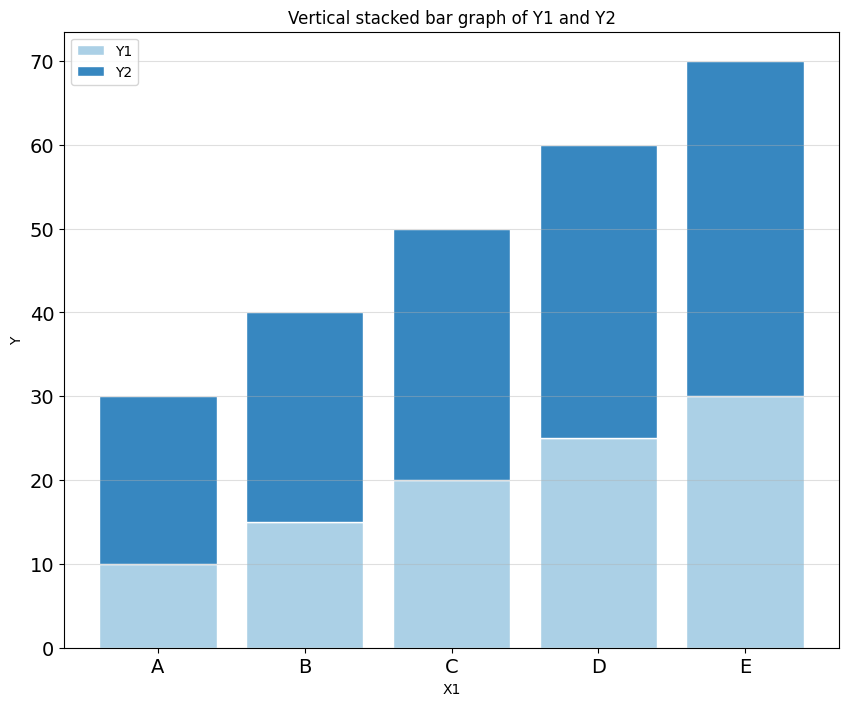

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create data
X1 = ['A', 'B', 'C', 'D', 'E']
Y1 = [10, 15, 20, 25, 30]
Y2 = [20, 25, 30, 35, 40]

# Set color scheme and font
colors = sns.color_palette("Blues", 2)

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(X1, Y1, color=colors[0], edgecolor='white', linewidth=1)
ax.bar(X1, Y2, bottom=Y1, color=colors[1], edgecolor='white', linewidth=1)

# Set axis labels and ticks
ax.set_xlabel('X1')
ax.set_ylabel('Y')
ax.set_xticklabels(X1)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(axis='y', alpha=0.4)

# Add legend and title
ax.legend(['Y1', 'Y2'], loc='upper left')
ax.set_title('Vertical stacked bar graph of Y1 and Y2')

# Save the graph as PDF or PNG
plt.savefig('vertical_stacked_bar_graph.png', dpi=300, bbox_inches='tight')